# Исследование моментов высших порядков

#### Подключение библиотек и вспомогательные функции  

In [1]:
                                                                                                                                                                                                    # Форматирование и внешний вид графиков
import matplotlib.pyplot as plt

# -*- coding: utf-8 -*-
from __future__ import unicode_literals

plt.rc('font', family='Arial')

In [2]:
def setXlim(ax, deltaXmin, deltaXmax):
    xlim = ax.get_xlim()
    xmin, xmax = xlim[0], xlim[1]
    ax.set_xlim(xmin + deltaXmin, xmax + deltaXmax)

def setYlim(ax, deltaYmin, deltaYmax):
    ylim = ax.get_ylim()
    ymin,ymax = ylim[0], ylim[1]
    ax.set_ylim(ymin + deltaYmin, ymax + deltaYmax)

# отрисовка графика гистограмм
def showHist(norm, mu, sigma, ax, nbins = 30):
    hist, bins, ignore = ax.hist(norm, nbins, normed = True, edgecolor='black')
    
    xmin, xmax = min(bins), max(bins)
    ymin, ymax = min(hist), max(hist)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    title = "Xmin: {0:.4f}; Xmax: {1:.4f};\n".format(xmin, xmax) + \
            "Ymin: {0:.4f}; Ymax: {1:.4f};\n".format(ymin, ymax)
    ax.set_xlabel(title)
    
    return hist, bins

## Генерация изображений

### 1. Генерация массивов с нормальным распределением

Случайная велечина с требуемыми параметрами математического ожидания (МО) $\mu$ и среднеквадратического отклонения (СКО) $\sigma$ получаются по формуле:

$$n = \mu + \sigma x$$

где $x$ - нормальная случайная величина с параметрами распределения $N(0,1)$

In [3]:
import numpy as np
def randNormal(mu, sigma, nx, ny):
    x = mu + sigma * np.random.randn(nx*ny)
    return x

In [4]:
# Генерация массива элементов с заданными параметрами нормального распределения
mu, sigma = 0, 1
Nx, Ny = 1000, 1000

norm1 = randNormal(mu, sigma, Nx, Ny)
norm2 = randNormal(mu, sigma, Nx, Ny)

Плотность вероятности для нормального (гауссова) распределения:
$$p(x, \mu, \sigma)=\dfrac{1}{\sqrt{2\pi\sigma^2}} e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

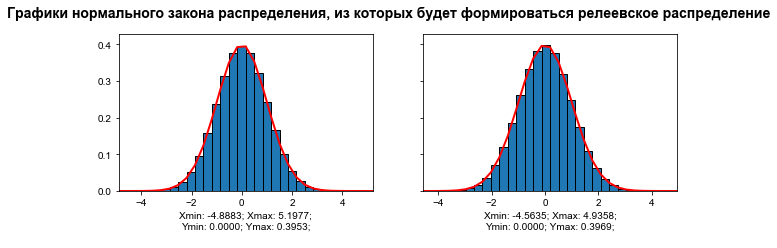

In [5]:
# Отрисовка гистограм элементов с нормальным законом распределения
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 3))
fig.suptitle('Графики нормального закона распределения, из которых будет формироваться релеевское распределение', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

#плотность верятности нормального закона
p_norm = lambda x, mu, sigma: 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

# Первый график
hist, bins = showHist(norm1, mu, sigma, ax1, nbins = 30)
ax1.plot(bins, p_norm(bins, mu, sigma), linewidth=2, color='r')  #Грфик огибающей

# Второй график
hist, bins = showHist(norm2, mu, sigma, ax2, nbins = 30)
ax2.plot(bins, p_norm(bins, mu, sigma), linewidth=2, color='r')  #Грфик огибающей

setYlim(ax1, deltaYmin = 0, deltaYmax = 0.03)

plt.show()

### 2. Генерация массива с релеевским законом рапределения

Случайная велечина с релеевским законом распределения получаются по формуле: $r= \sqrt{n_{1}^2 + n_{2}^2}$

где $n_1$ и $n_2$ - независимые случайные величины с нормальным законом расределения

In [6]:
def randRelay(sigma, nx, ny):
    norm1 = randNormal(0, sigma, Nx, Ny)
    norm2 = randNormal(0, sigma, Nx, Ny)
    return np.sqrt(norm1 ** 2 + norm2 ** 2)

relay = randRelay(sigma, Nx, Ny)

Плотность вероятности для релеевского распределения:
$$f(x, \sigma)=\dfrac{x}{\sigma^2} e^{-\dfrac{x^2}{2\sigma^2}}$$

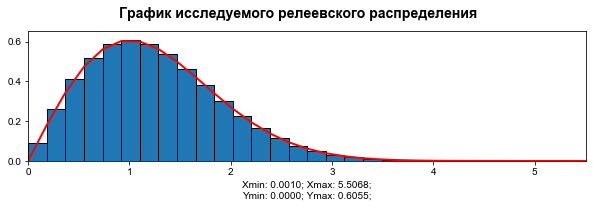

In [7]:
# Отрисовка гистограммы элементов с релеевским законом распределения
fig = plt.figure(figsize=(10, 2.5))
ax = plt.subplot()
fig.suptitle('График исследуемого релеевского распределения', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

#плотность верятности релеевского расределения
p_relay = lambda x, sigma: x/(sigma**2) * np.exp( - x**2 / (2 * sigma**2))

hist, bins = showHist(relay, mu, sigma, ax, nbins = 30)
ax.plot(bins, p_relay(bins, sigma), linewidth=2, color='r')  #Грфик огибающей

setYlim(ax, deltaYmin = 0, deltaYmax = 0.05)

plt.show()

### 3. Моменты распределения случайной дискретной величины

1) Формулы расчета начальных моментов:
$$\hspace{1.5cm} m_k(x) = \dfrac{1}{N} \sum\limits_{i=1}^N x_i^k$$
$\hspace{.5cm}$ где $x_i$ - дискретные случайные величины

2) Формулы расчета центральных моментов:

$\hspace{1.5cm} M_2 = m_2 - m_1^2$

$\hspace{1.5cm} M_3 = m_3 - 3\ m_1\ m_2 + 2\ m_1^3$

$\hspace{1.5cm} M_4 = m_4 - 4\ m_3\ m_1 + 6\ m_2\ m_1^2 - 3\ m_1^4$

3) Коэффициент асимметрии: $\hspace{1.5cm} k = \dfrac{M_3}{\sqrt{M_2^3}}$

4) Коэффициент эксцесса: $\hspace{2.0cm} \gamma = \dfrac{M_4}{M_2^2} - 3$

In [8]:
# Функция расчета начального момента k-порядка
def m(x, k): 
    if x.size == 0:
        raise Exception('Получен пустой массив')
    
    return np.sum(x**k) / float(x.size)

m1 = lambda x: m(x, 1)
m2 = lambda x: m(x, 2)
m3 = lambda x: m(x, 3)
m4 = lambda x: m(x, 4)

# Функции расчета центральных моментов
M2 = lambda x: m2(x) - m1(x) ** 2
M3 = lambda x: m3(x) - 3 * m1(x) * m2(x) + 2 * (m1(x)**3)
M4 = lambda x: m4(x) - 4 * m3(x) * m1(x) + 6 * m2(x) * (m1(x) ** 2) - 3 * (m1(x)**4)

# Функции расчета коэффициента асимметрии
k = lambda x: M3(x) / np.sqrt(M2(x) ** 3)

# Функции расчета коэффициента эксцесса
g = lambda x: M4(x) / (M2(x) ** 2) - 3

### 3. Генерация серии экспериментов

Размер формируемой выборки для анализа задается либо числом, либо вычисляется исходя из колличества независимых экспериментов, которые необходимо провести и размеров анализируемого окна.

In [9]:
#Nx, Ny = 1000, 1000  # Размер исследуемой выборки может быть задан заранее

N_expr = 10000                 # Колличество независимых экспериментов
n_wins = range(2, 101, 1)     # Различные размеры скользящих окон
signal = 0
# n_wins = range(2,11,1)
# n_wins = [2]

dir_name = "data"

Данные будут сохраняются в текстовом формате

In [10]:
import os
def checkFile(path):
    res = os.path.isfile(path)
    if res:
        print "File '{0}' exists".format(path)
    else:
        print "File '{0}' not found".format(path)
    return res

def loadFile(dir_name, file_name):
    path = os.path.join(dir_name, file_name)
    if checkFile(path):
        print "File '{0}' is loaded\n".format(path)
        return np.loadtxt(path)
        
    return None    

def saveFile(dir_name, file_name, data, fmt=b'%.18e'):
    path = os.path.join(dir_name, file_name)
    with file(path, 'w') as outfile:
        print "Save file '{0}'".format(path)
        np.savetxt(outfile, data, fmt=fmt)
    
    outfile.close()
    
def saveToEndFile(dir_name, file_name, data, fmt=b'%.18e'):
    path = os.path.join(dir_name, file_name)
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
    with file(path, 'a') as outfile:
        print "Save to end file '{0}'".format(path)
        np.savetxt(outfile, data, fmt=fmt)

#### 3.1 Генерация изображений с релеевским законом распределения

Дисперсия случайной величины, распределенной по релеевскому закону:
$$M_2 = \dfrac{4-\pi}{2}\sigma^2$$

Т.о. для того чтобы расчитывать параметры распределения для требуемой дисперсии:
$$\sigma = \sqrt{\dfrac{2M_2}{4-\pi}}$$

In [11]:
import math
rayleigh_dispersion = 1
sigma = math.sqrt(2*rayleigh_dispersion / (4.0 - math.pi))
print sigma

1.52639974553


Результаты моделирования складываются в соответствующую директорию, путь к которой указывается относительно рабочего документа:

In [12]:
dir_image = os.path.join(dir_name, "rayleigh")
file_image_name = "Image_{0}_{1}x{2}.{3}"
suffix_image = "txt"

In [13]:
def getSampleSize(n_expr, nx, ny):
    '''Calculate size of sample    
    
    Keyword arguments:
    N -- number of independent experiments, 
    nx, ny -- Sliding window size
    '''
    y = math.ceil(math.sqrt(n_expr))
    x = math.ceil(n_expr / y)
    
    return int(x) * nx, int(y) * ny

def getRelayImage(nx, ny, sigma, dir_name, file_name):
    relayImage = loadFile(dir_name, file_name)
    
    if(relayImage is None):
        relayImage = randRelay(sigma, Nx, Ny).reshape(Nx, Ny)
        saveFile(dir_name, file_name, relayImage)

    return relayImage

Запускаем процесс генерации файлов изображений, если они не были сформированы заранее

In [14]:
for n in n_wins:
    Nx, Ny = getSampleSize(N_expr, n, n)  # Размер исследуемой выборки вычисляется
    image_name = file_image_name.format(rayleigh_dispersion, str(Nx), str(Ny), suffix_image)
    
    getRelayImage(Nx, Ny, sigma, dir_image, image_name)

File 'data\rayleigh\Image_1_200x200.txt' exists
File 'data\rayleigh\Image_1_200x200.txt' is loaded

File 'data\rayleigh\Image_1_300x300.txt' exists
File 'data\rayleigh\Image_1_300x300.txt' is loaded

File 'data\rayleigh\Image_1_400x400.txt' exists
File 'data\rayleigh\Image_1_400x400.txt' is loaded

File 'data\rayleigh\Image_1_500x500.txt' exists
File 'data\rayleigh\Image_1_500x500.txt' is loaded

File 'data\rayleigh\Image_1_600x600.txt' exists
File 'data\rayleigh\Image_1_600x600.txt' is loaded

File 'data\rayleigh\Image_1_700x700.txt' exists
File 'data\rayleigh\Image_1_700x700.txt' is loaded

File 'data\rayleigh\Image_1_800x800.txt' exists
File 'data\rayleigh\Image_1_800x800.txt' is loaded

File 'data\rayleigh\Image_1_900x900.txt' exists
File 'data\rayleigh\Image_1_900x900.txt' is loaded

File 'data\rayleigh\Image_1_1000x1000.txt' exists
File 'data\rayleigh\Image_1_1000x1000.txt' is loaded

File 'data\rayleigh\Image_1_1100x1100.txt' exists
File 'data\rayleigh\Image_1_1100x1100.txt' is 

KeyboardInterrupt: 